# Smiley Face, STAC and Cloud Optimised Geotiffs

Please check out my blog post associated to this code if you would like some expansion on the code shown below:
http://www.acgeospatial.co.uk/smiley-face-stac-and-cloud-optimised-geotiffs


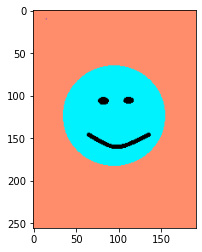

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_file = 'smiley.png'
img = cv2.imread(image_file)
plt.imshow(img)
plt.show()

In [2]:
print(img.shape)

(256, 191, 3)


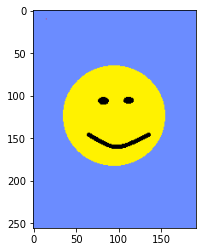

In [3]:
RGBimage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGBimage)
plt.show()

In [4]:
print(RGBimage.shape)

(256, 191, 3)


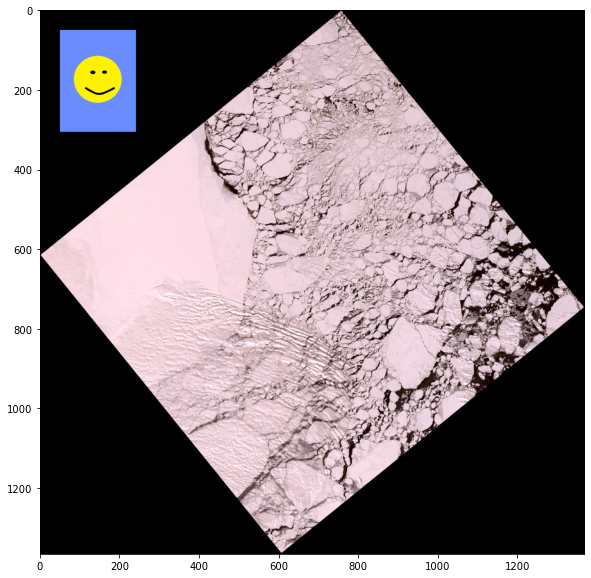

In [5]:
# https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
l_img = cv2.imread("Landsat_thumb_large.jpg")
x_offset=y_offset=50
l_img[y_offset:y_offset+RGBimage.shape[0], x_offset:x_offset+RGBimage.shape[1]] = RGBimage
plt.figure(figsize=(20,10))
plt.imshow(l_img)
plt.show()

In [6]:
small = cv2.resize(RGBimage, (0,0), fx=0.2, fy=0.2) 


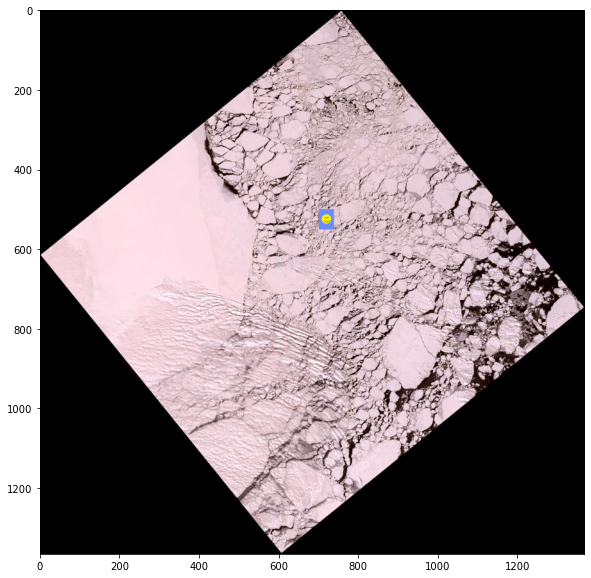

In [7]:
l_img = cv2.imread("Landsat_thumb_large.jpg")
x_offset=700
y_offset=500
l_img[y_offset:y_offset+small.shape[0], x_offset:x_offset+small.shape[1]] = small
plt.figure(figsize=(20,10))
plt.imshow(l_img)
plt.show()

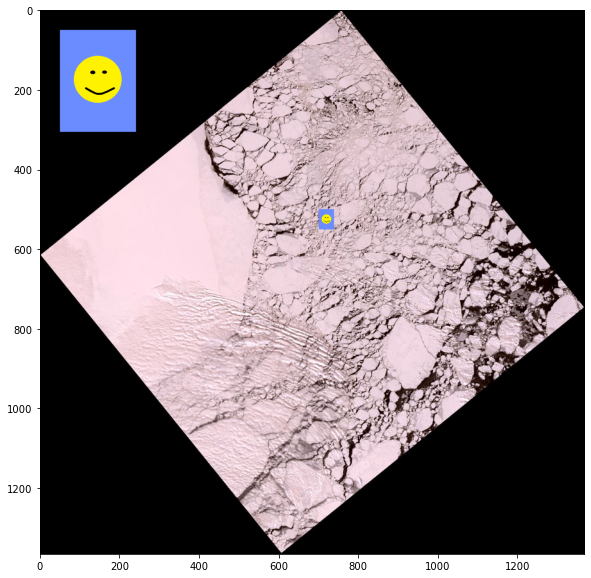

In [8]:
x_offset=y_offset=50
l_img[y_offset:y_offset+RGBimage.shape[0], x_offset:x_offset+RGBimage.shape[1]] = RGBimage
plt.figure(figsize=(20,10))
plt.imshow(l_img)
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\rasterio\__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


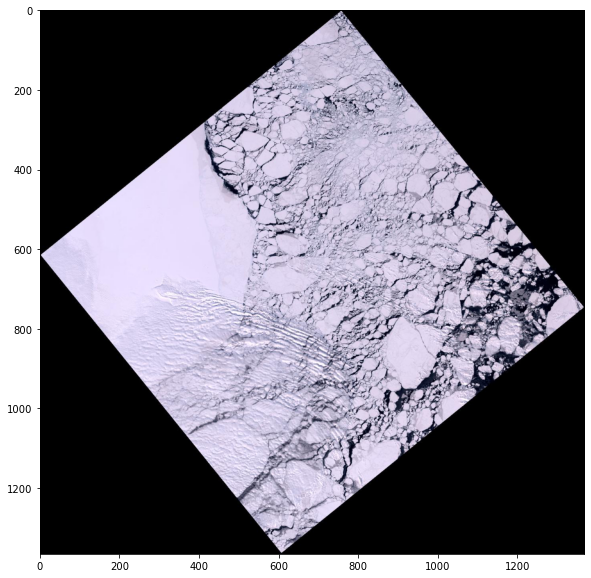

In [9]:
%matplotlib inline
image_url = "https://landsat-pds.s3.amazonaws.com/c1/L8/001/003/LC08_L1GT_001003_20170516_20170516_01_RT/LC08_L1GT_001003_20170516_20170516_01_RT_thumb_large.jpg"
from rasterio.plot import show
import rasterio
src = rasterio.open(image_url)
plt.figure(figsize=(20,10))
show(src.read())

(1366, 1368, 3)


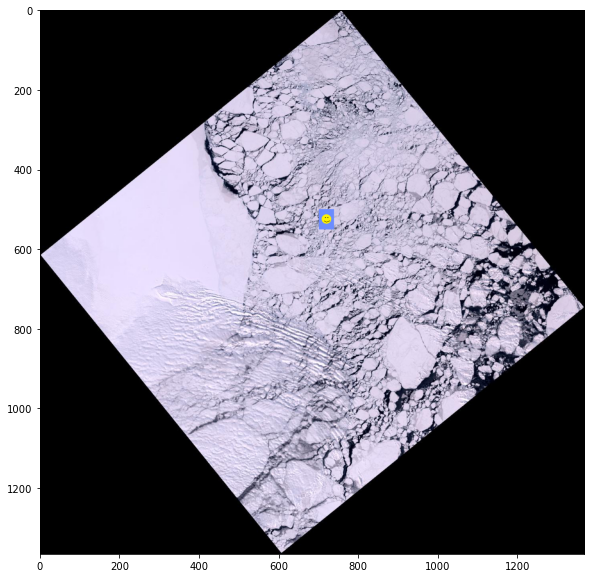

In [10]:
array = src.read()
rearranged_arr = array.transpose(1, 2, 0)
print(rearranged_arr.shape)
x_offset=700
y_offset=500
rearranged_arr[y_offset:y_offset+small.shape[0], x_offset:x_offset+small.shape[1]] = small
plt.figure(figsize=(20,10))
plt.imshow(rearranged_arr)
plt.show()

In [11]:
import random
num1 = random.randint(300, 800)
print(num1)

622


(1366, 1368, 3)


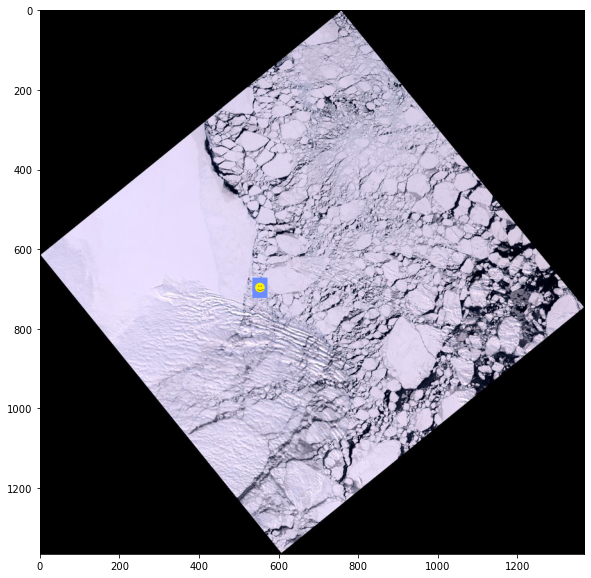

In [12]:
array = src.read()
rearranged_arr = array.transpose(1, 2, 0)
print(rearranged_arr.shape)
x_offset=random.randint(300, 800)
y_offset=random.randint(300, 800)
rearranged_arr[y_offset:y_offset+small.shape[0], x_offset:x_offset+small.shape[1]] = small
plt.figure(figsize=(20,10))
plt.imshow(rearranged_arr)
plt.show()

In [13]:
from satsearch import Search
import geopandas as gpd
gdf = gpd.read_file('map.geojson')
bounds = gdf.bounds
boundary = bounds.values.tolist()

search = Search(bbox=boundary[0], datetime='2020-05-01/2020-07-30', collections=['sentinel-s2-l2a-cogs'], 
                url='https://earth-search.aws.element84.com/v0')

items = search.items()
file_url = items[52].asset('visual')['href']
print(file_url)



https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/30/U/XB/2020/6/S2A_30UXB_20200625_0_L2A/TCI.tif


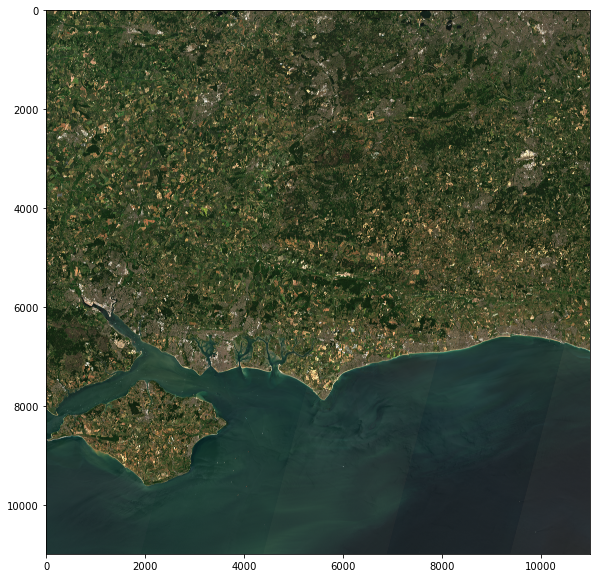

In [14]:
src = rasterio.open(file_url)
plt.figure(figsize=(20,10))
show(src.read())

(10980, 10980, 3)


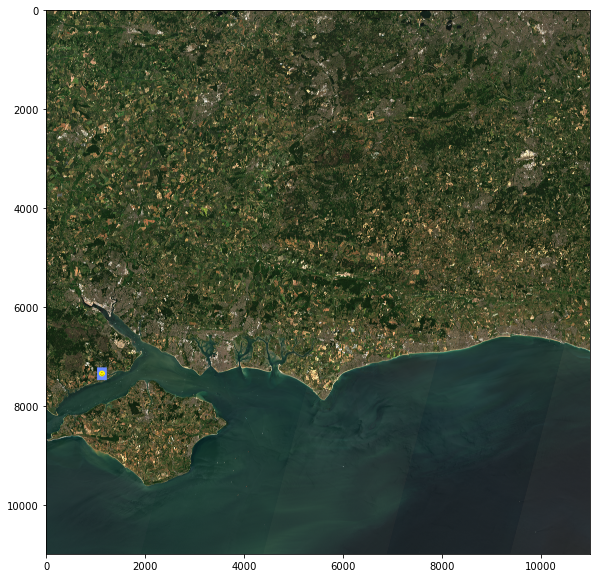

In [15]:
array = src.read()
rearranged_arr = array.transpose(1, 2, 0)
print(rearranged_arr.shape)
x_offset=random.randint(300, 9000)
y_offset=random.randint(300, 9000)
rearranged_arr[y_offset:y_offset+RGBimage.shape[0], x_offset:x_offset+RGBimage.shape[1]] = RGBimage
plt.figure(figsize=(20,10))
plt.imshow(rearranged_arr)
plt.show()